## 선형회귀 알고리즘

* 여기서 알아야 할 것 -> 회귀계수 꼭 ! 이해하기

* 선형회귀란 ?

> 주어진 데이터에서 대표할 수 있는 직선을 구하는것이다. 절편과 기울기를 구해서 직선을 구하고 그 직선을 회귀선이라고 한다. 이것을 선형회귀 분석이라고 한다.

> y=ax+b a는 기울기(가중치)  / b는 절편

> 회귀문제만 가능!

* 회귀계수

> coef : 기울기 / intercept = 절편 

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/cars.csv'
data = pd.read_csv(path)

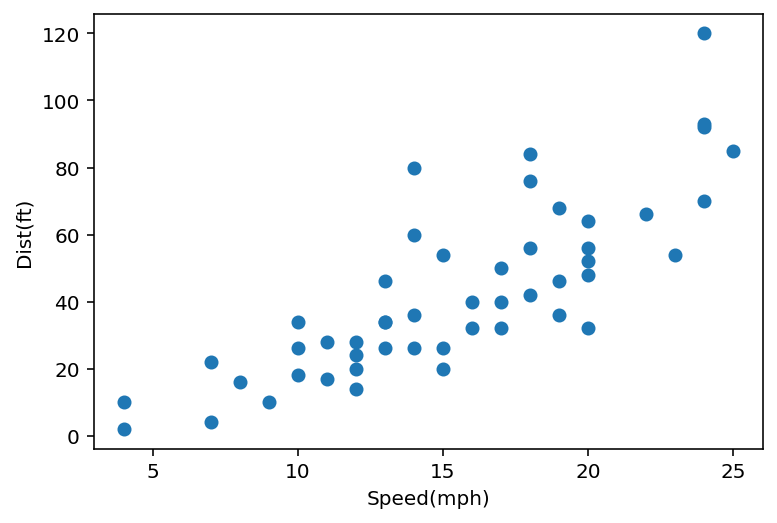

In [3]:
# speed, dist 관계
plt.scatter(x='speed', y='dist', data=data)
plt.xlabel('Speed(mph)') #마일퍼아워
plt.ylabel('Dist(ft)')
plt.show()

### 데이터 준비

In [4]:
# target 확인
target = 'dist'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [5]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  

### 모델링

In [6]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [7]:
# 선언하기
model = LinearRegression()

In [8]:
# 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# 회귀 계수 확인하기

print(model.coef_) #기울기
print(model.intercept_) #절편

[3.86309751]
-17.07724665391965


In [14]:
# 예측하기
y_pred = model.predict(x_test)

In [16]:
# 평가하기
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

10.337667304015294
0.7308201428360215


#### 회귀식 시각화

In [11]:
# 선형회귀식
a = model.coef_ #기울기
b = model.intercept_ #절편
x = np.linspace(x_test.min(), x_test.max(), 10)
y = a * x + b

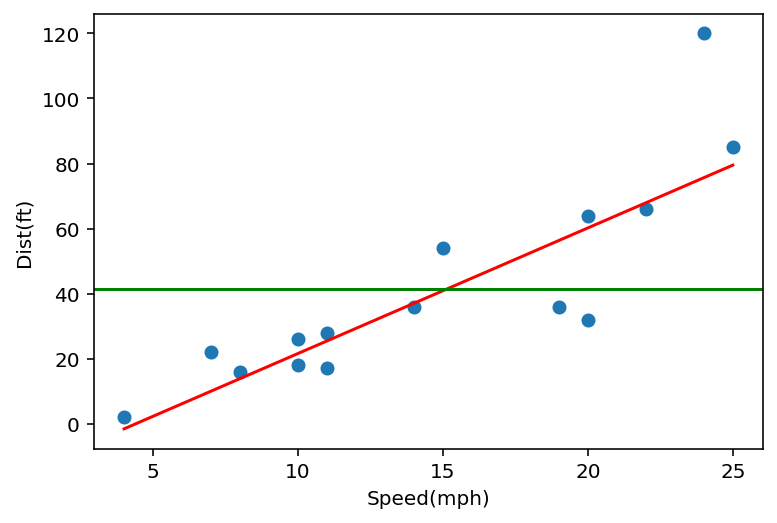

In [12]:
# 시각화 Xtest와 Ytest가 가지고 있는 값 정답임. / x의 값이 많으면 하나만 골라서 그려야함 
mean_speed= y_test.mean()

plt.scatter(x_test, y_test)
plt.plot(x, y, color='r') #y바
plt.axhline(mean_speed, color='g')
plt.xlabel('Speed(mph)')
plt.ylabel('Dist(ft)')
plt.show()

#### 예측값, 실제값 시각화

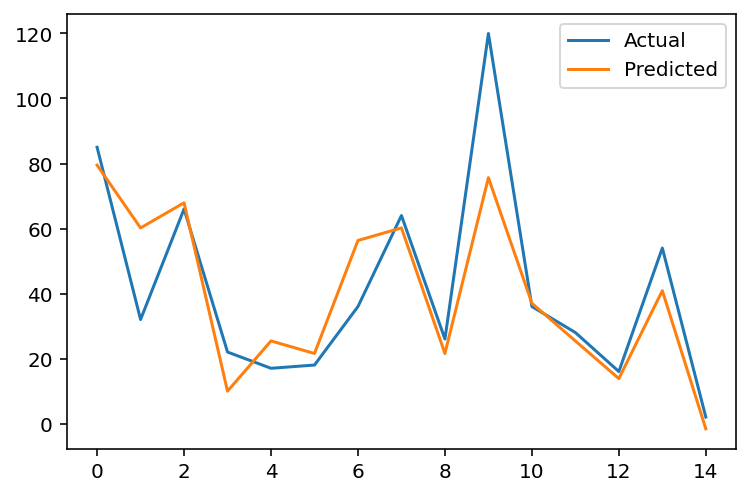

In [18]:
# 시각화
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()

plt.show()